In [6]:
from numpy import *

In [3]:
def loadDataSet(filename):
    # 数据属性个数
    numFeat = len(open(filename).readline().split('\t')) - 1 
    dataMat = []
    labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat


def standRegres(xArr,yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T * xMat 
    if linalg.det(xTx) == 0: # 计算行列式
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [4]:
mydata,mylabel = loadDataSet('C:\Users\jiao.fang.jiaofang\Desktop\data\Ch08\ex0.txt')

In [18]:
ws = standRegres(mydata,mylabel)

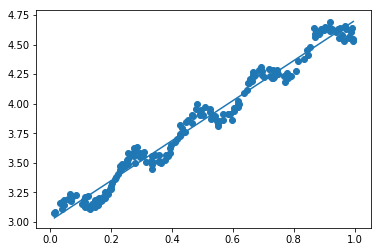

In [21]:
# 绘制原始数据点
import matplotlib.pyplot as plt
%matplotlib inline
# 画图必用
fig = plt.figure()
ax = fig.add_subplot(111)
xMat = mat(mydata)
yMat = mat(mylabel)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])

xcopy = xMat.copy()
xcopy.sort(0)
yHat = xcopy * ws
ax.plot(xcopy[:,1],yHat)
plt.show()

In [23]:
# 相关系数
corrcoef(yHat.T,yMat)

array([[ 1.        ,  0.13653777],
       [ 0.13653777,  1.        ]])

In [29]:
# 局部加权线性回归函数
def lwlr(testPoint,xArr,yArr,k=1):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    m = xMat.shape[0]
    weights = mat(eye((m))) # 初始权重,对角矩阵
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = exp(diffMat * diffMat.T / (-2.0 * k ** 2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0:
        print "this matrix is singular, cannot do inverse"
        return 
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws
# 每个点调用lwlr,有助于求解k
def lwlrTest(testArr,xArr,yArr,k=1):
    testArr = mat(testArr)
    m = testArr.shape[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [25]:
mylabel[0]

3.176513

In [26]:
lwlr(mydata[0],mydata,mylabel,1)

matrix([[ 3.12204471]])

In [27]:
lwlr(mydata[0],mydata,mylabel,0.001)

matrix([[ 3.20175729]])

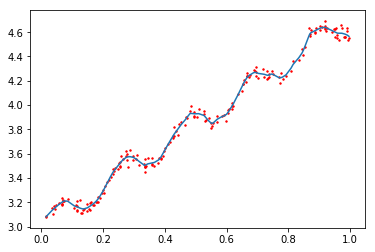

In [32]:
# 为了得到数据集所有点的估计，可以调用lwlrTest函数
yHat = lwlrTest(mydata,mydata,mylabel,0.01)
xMat = mat(mydata)
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0],mat(mylabel).T.flatten().A[0],s=2,c='red')
plt.show()

In [34]:
# 岭回归
def ridgeRegres(xMat,yMat,lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + lam * eye(xMat.shape[1])
    if linalg.det(xTx) == 0:
        print  "this matrix is singular, cannot do inverse"
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

def ridgeTest(xArr,yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean
    xMat = (xMat - mean(xMat,0))/var(xMat,0)
    numTestPts = 30
    wMat = zeros((numTestPts,xMat.shape[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat,yMat,exp(i-10))
        wMat[i,:] = ws.T
    return wMat
    

In [36]:
abX,abY = loadDataSet('C:\Users\jiao.fang.jiaofang\Desktop\data\Ch08\\abalone.txt')

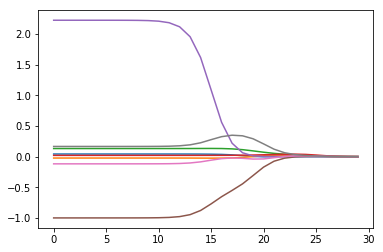

In [37]:
ridgeWeights=ridgeTest(abX,abY)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

In [44]:
# 前项逐步回归
def stageWise(xArr,yArr,eps=0.01,numIt=100):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    # 数据标准化
    yMat = yMat - mean(yMat,0)
    xMat = (xMat - mean(xMat,0))/var(xMat,0)
    m,n = xMat.shape
    returnMat = zeros((numIt,n))
    ws = zeros((n,1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        print ws.T
        lowestError = inf
        for j in range(n):
            wsTest = ws.copy()
            wsTest[j] += eps * sign
            yTest = xMat * wsTest
            rssE = rssError(yMat.A,yTest.A)
            if rssE < lowestError:
                lowestError = rssE
                wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    return returnMat        